Imports

In [136]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [137]:
#reading csv 
sales = pd.read_csv("supermarket_sales.csv")

sales
#adjust income 
sales["gross income"] = sales["gross income"] * 10000
#rename column 
sales["Cost of Goods Sold"] = sales["cogs"] 
#drop cogs 
sales = sales.drop('cogs', axis=1)
sales = sales.drop('Invoice ID', axis=1)
sales

Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date   Time      Payment  \
0         74.69         7  26.1415   548.9715   1/5/2019  13:08      Ewallet   
1         15.28         5   3.8200    80.2200   3/8/2019  10:29         Cash   
2         46.33         7  16.2155   340.5255   3/3/2019  13:23  Credit card   
3         58.22         8  23.2880   489.0480  1/27/2019  20:33      Ewallet   
4         86.31         7  30.2085   634.3785   2/8/2019  10:37      Ewallet   
..          ...       ...      ...        ...        ...    ...          ...   
995       40.35         1   2.0175    42.3675  1/29/2019  13:46      Ewallet   
996       97.38        10  48.6900  1022.4900   3/2/2019  17:16      Ewallet   
997       31.84         1   1.5920    33.4320   2/9/2019  13:22         Cash   
998       65.82         1   3.2910    69.1110  2/22/2019  15:33         Cash   
999       88.34         7  30.9190   649.2990  2/18/2019  13:28         Cash   

     gross margin percentage  gross income  Rating  Cost of Goods Sold  
0                   4.761905      261415.0     9.1              522.83  
1                   4.761905       38200.0     9.6               76.40  
2                   4.761905      162155.0     7.4              324.31  
3                   4.761905      232880.0     8.4              465.76  
4                   4.761905      302085.0     5.3              604.17  
..                       ...           ...     ...                 ...  
995                 4.761905       20175.0     6.2               40.35  
996                 4.761905      486900.0     4.4              973.80  
997                 4.761905       15920.0     7.7               31.84  
998                 4.761905       32910.0     4.1               65.82  
999                 4.761905      309190.0     6.6              618.38  

[1000 rows x 16 columns]

In [138]:
#round some columns to simplify data for model training 
sales['Rating'] = np.floor(sales['Rating'])

# Check if Time column is datetime type before using .dt accessor
if pd.api.types.is_datetime64_any_dtype(sales['Time']):
    sales['Time'] = sales['Time'].dt.floor('H')
else:
    # Convert to datetime first if it's not already
    sales['Time'] = pd.to_datetime(sales['Time'])
    sales['Time'] = sales['Time'].dt.floor('H')

sales['Total'] = np.round(sales['Total'] / 5) * 5
sales['Cost of Goods Sold'] = np.round(sales['Cost of Goods Sold'] / 5) * 5
sales['Unit price'] = np.round(sales['Unit price'] / 5) * 5

# Check if Date column is datetime type before using .dt accessor
if pd.api.types.is_datetime64_any_dtype(sales['Date']):
    sales['Date'] = sales['Date'].dt.month
else:
    # Convert to datetime first if it's not already
    sales['Date'] = pd.to_datetime(sales['Date'])
    sales['Date'] = sales['Date'].dt.month

#round income
sales['gross income'] = np.round(sales['gross income'] / 10000) * 10000

sales

/tmp/ipykernel_160/2495232511.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%   Total  Date                Time  \
0          75.0         7  26.1415   550.0     1 2025-03-27 13:00:00   
1          15.0         5   3.8200    80.0     3 2025-03-27 10:00:00   
2          45.0         7  16.2155   340.0     3 2025-03-27 13:00:00   
3          60.0         8  23.2880   490.0     1 2025-03-27 20:00:00   
4          85.0         7  30.2085   635.0     2 2025-03-27 10:00:00   
..          ...       ...      ...     ...   ...                 ...   
995        40.0         1   2.0175    40.0     1 2025-03-27 13:00:00   
996        95.0        10  48.6900  1020.0     3 2025-03-27 17:00:00   
997        30.0         1   1.5920    35.0     2 2025-03-27 13:00:00   
998        65.0         1   3.2910    70.0     2 2025-03-27 15:00:00   
999        90.0         7  30.9190   650.0     2 2025-03-27 13:00:00   

         Payment  gross margin percentage  gross income  Rating  \
0        Ewallet                 4.761905      260000.0     9.0   
1           Cash                 4.761905       40000.0     9.0   
2    Credit card                 4.761905      160000.0     7.0   
3        Ewallet                 4.761905      230000.0     8.0   
4        Ewallet                 4.761905      300000.0     5.0   
..           ...                      ...           ...     ...   
995      Ewallet                 4.761905       20000.0     6.0   
996      Ewallet                 4.761905      490000.0     4.0   
997         Cash                 4.761905       20000.0     7.0   
998         Cash                 4.761905       30000.0     4.0   
999         Cash                 4.761905      310000.0     6.0   

     Cost of Goods Sold  
0                 525.0  
1                  75.0  
2                 325.0  
3                 465.0  
4                 605.0  
..                  ...  
995                40.0  
996               975.0  
997                30.0  
998                65.0  
999               620.0  

[1000 rows x 16 columns]

In [156]:

label_encoder = LabelEncoder()

# Identify object columns in the DataFrame
# Convert the column names to sets before using the & operator
object_columns = set(sales.select_dtypes(include=['object']).columns) 
test_obj_col = set(sales.select_dtypes(include=['object']).columns) 



# Apply label encoding to each object column
for col in object_columns:
    sales[col] = label_encoder.fit_transform(sales[col])  # Encode the column
for col2 in test_obj_col: 
    sales[col2] = label_encoder.fit_transform(sales[col]) 

In [140]:
#check the data types of values 
sales.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
gross margin percentage    0
gross income               0
Rating                     0
Cost of Goods Sold         0
dtype: int64

In [141]:
#check data types 
sales.dtypes


Branch                              int64
City                                int64
Customer type                       int64
Gender                              int64
Product line                        int64
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                                int32
Time                       datetime64[ns]
Payment                             int64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Cost of Goods Sold                float64
dtype: object

In [143]:
# Select all integer columns
int_columns = sales.select_dtypes(include=['int64']).columns

# Convert those columns to float
for col in int_columns:
    sales[col] = sales[col].astype(float)


In [120]:
#save sales data 
sales.to_csv('cleaned.csv', index=False)

Text(0, 0.5, 'Income')

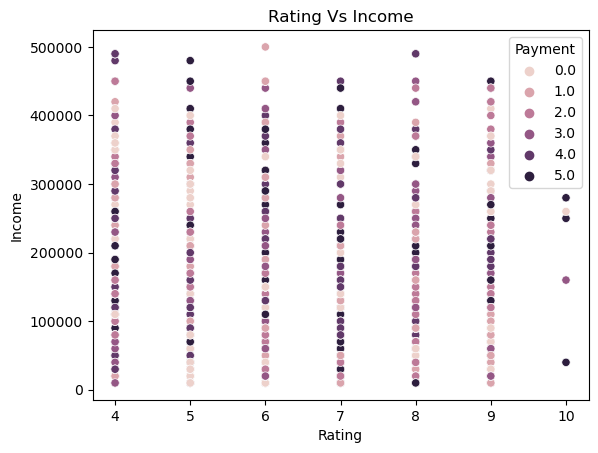

In [144]:
sns.scatterplot(data = sales, 
                x = "Rating", 
                y = "gross income",
                hue = "Payment") 

plt.title("Rating Vs Income") 
plt.xlabel("Rating") 
plt.ylabel("Income")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

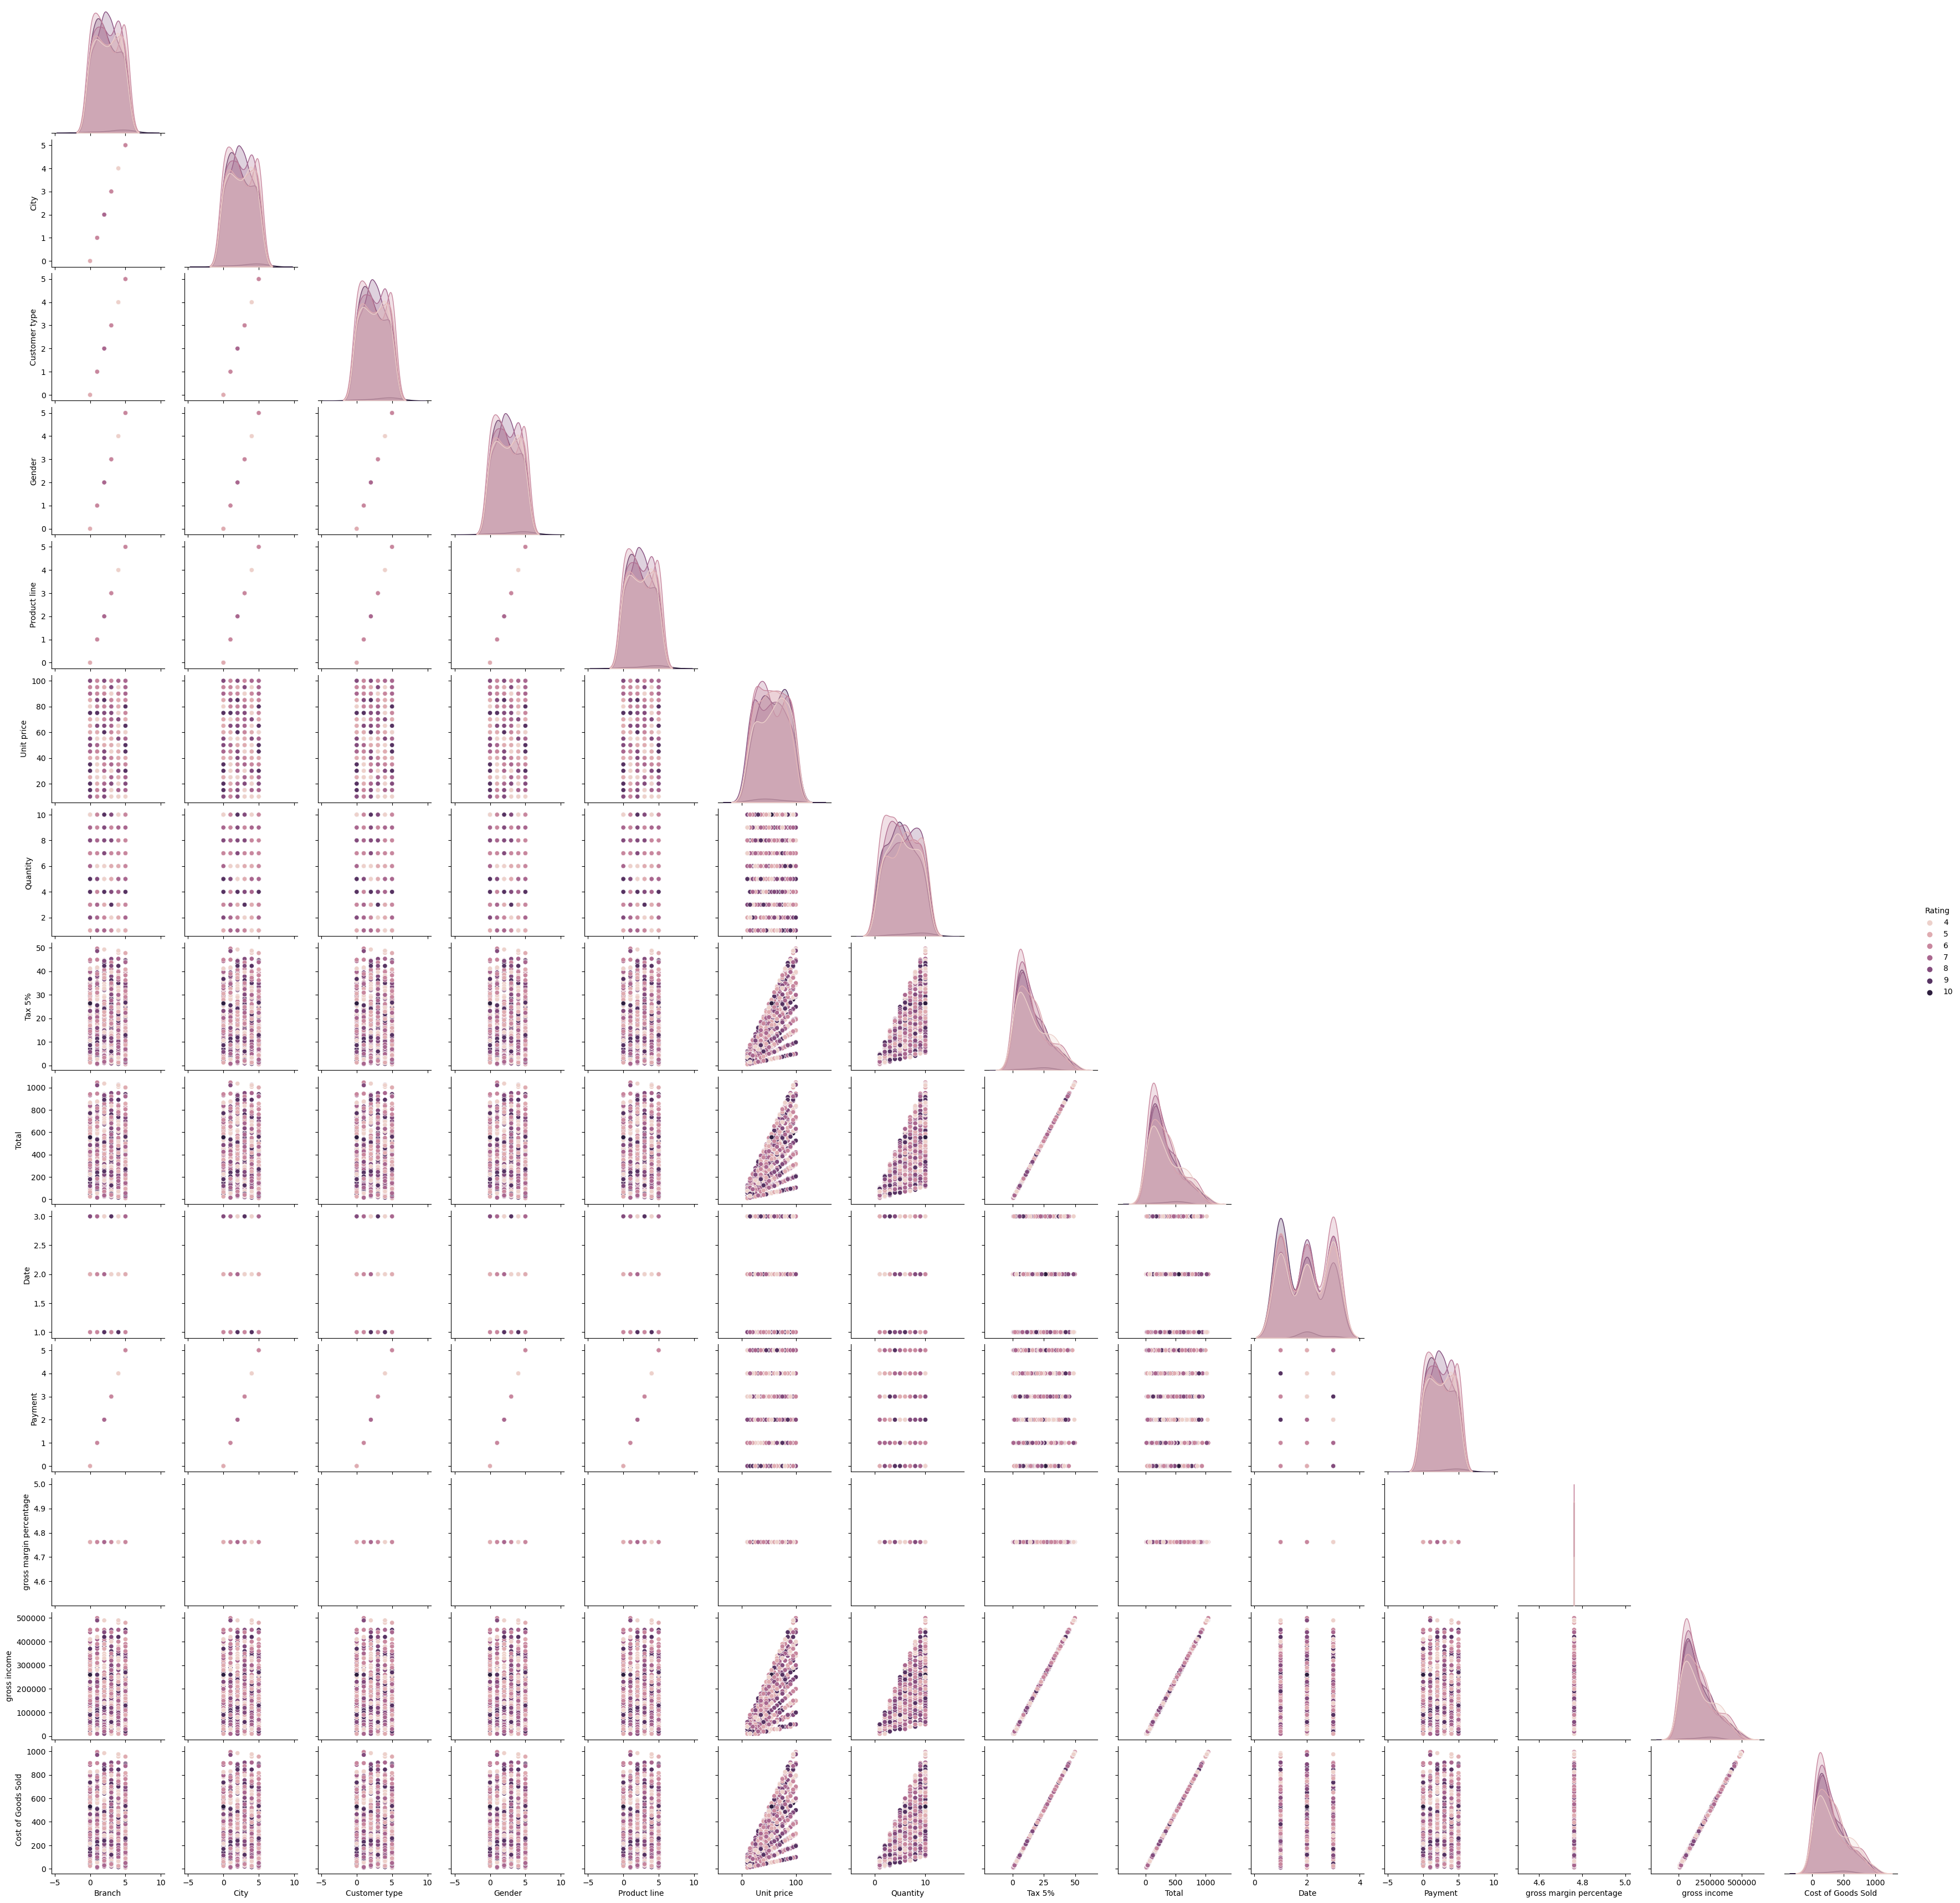

In [122]:
plt.figure(figsize=(15, 15))
sns.pairplot(data=sales, corner = True, hue="Rating")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


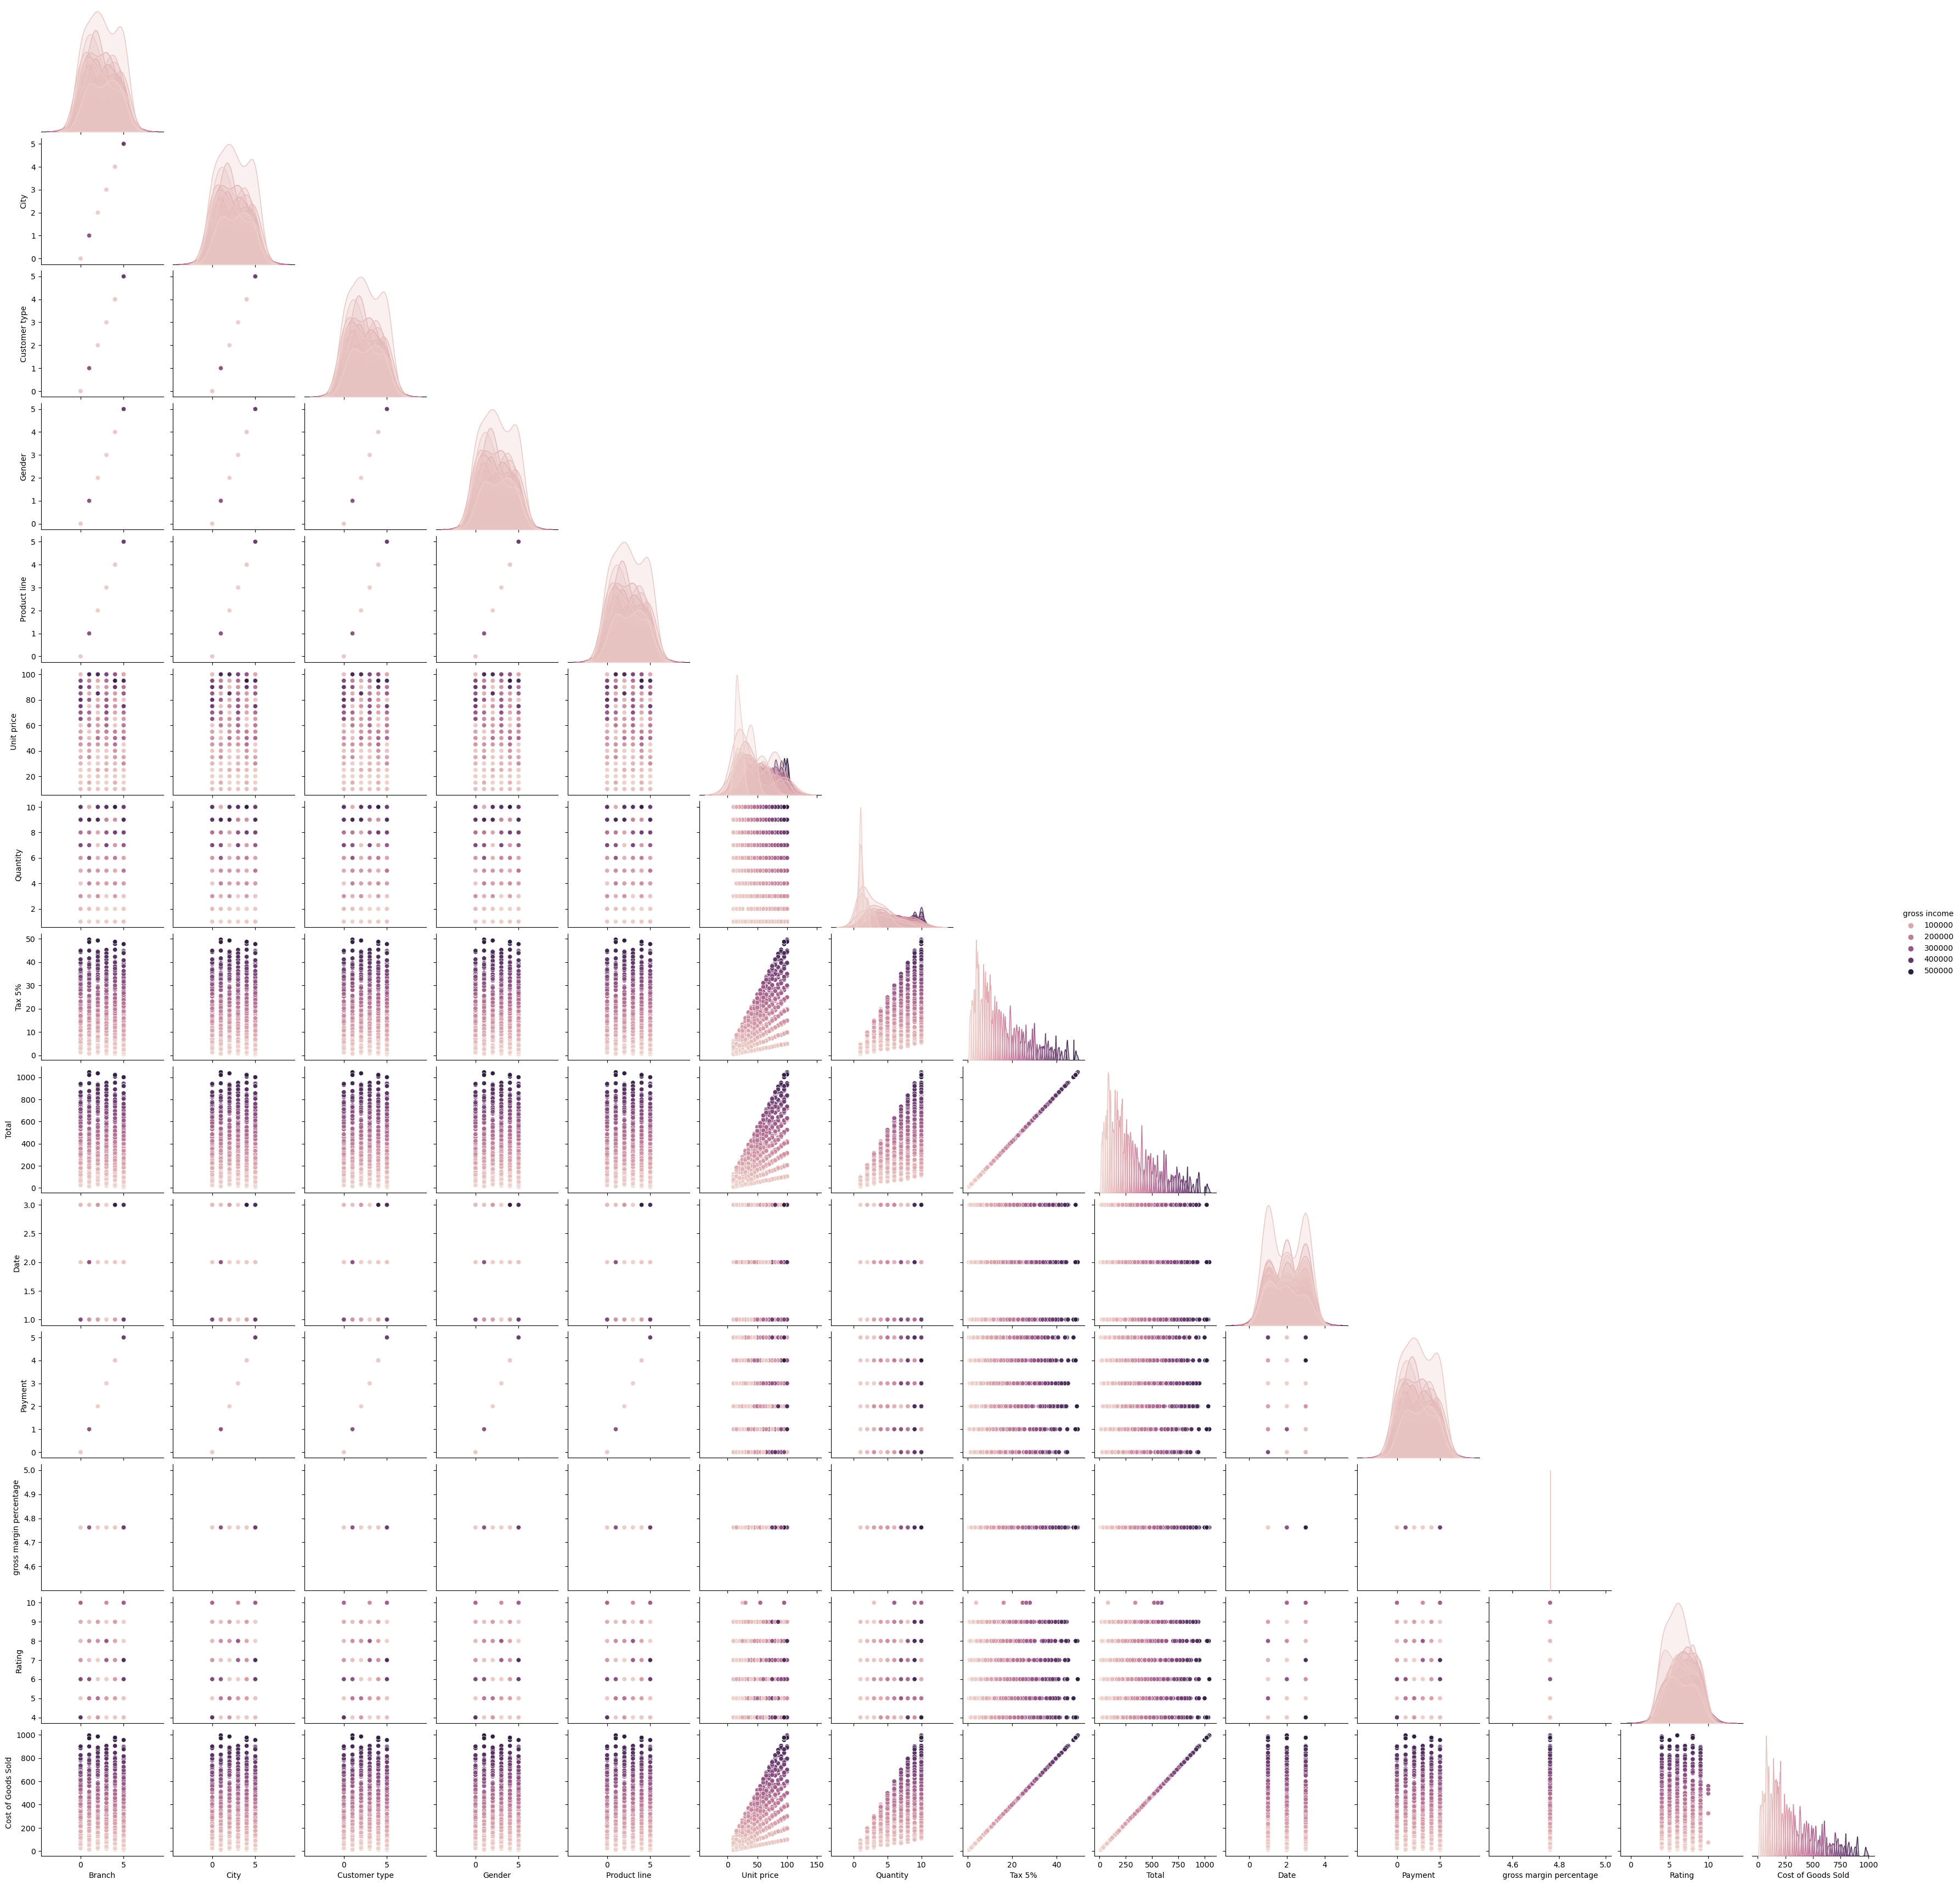

In [123]:
sns.pairplot(data=sales, corner = True, hue="gross income")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


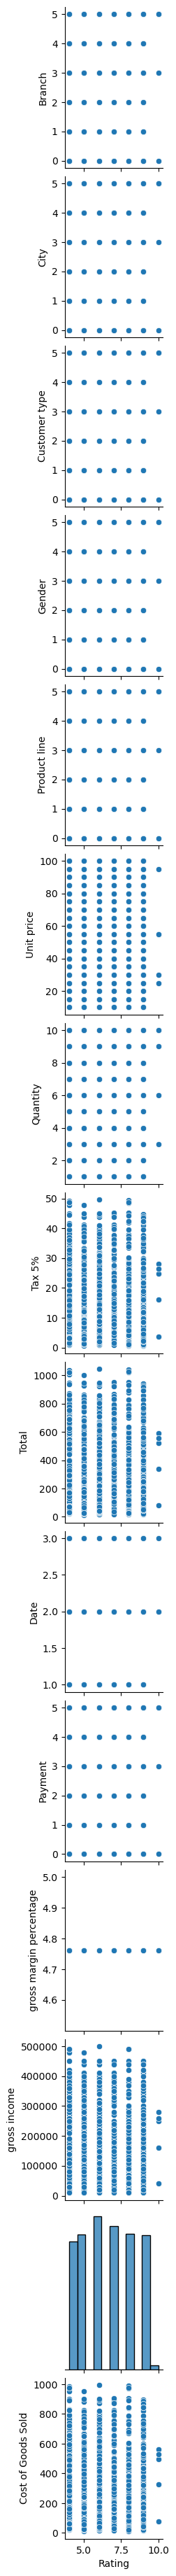

In [147]:
sns.pairplot(data=sales, corner = True, x_vars = "Rating")

<Axes: >

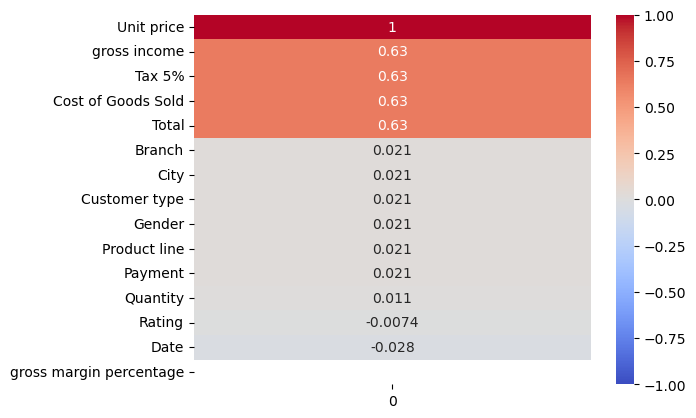

In [125]:
numeric_train = sales.select_dtypes(include=['number']) 
#putting correlatin data wtihin heatmap 
correlation_data = numeric_train.corrwith(sales["Unit price"]).sort_values(ascending=False).to_frame()


sns.heatmap(correlation_data, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap='coolwarm' 
            )  
 

<Axes: >

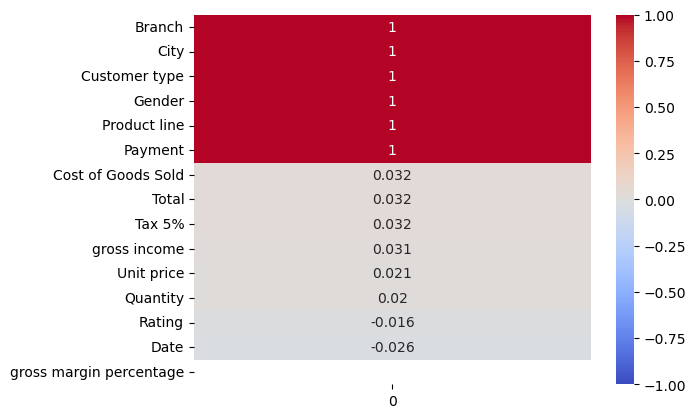

In [148]:
numeric_train = sales.select_dtypes(include=['number']) 
#putting correlatin data wtihin heatmap 
correlation_data = numeric_train.corrwith(sales["Branch"]).sort_values(ascending=False).to_frame()


sns.heatmap(correlation_data, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap='coolwarm' 
            )  

<Axes: >

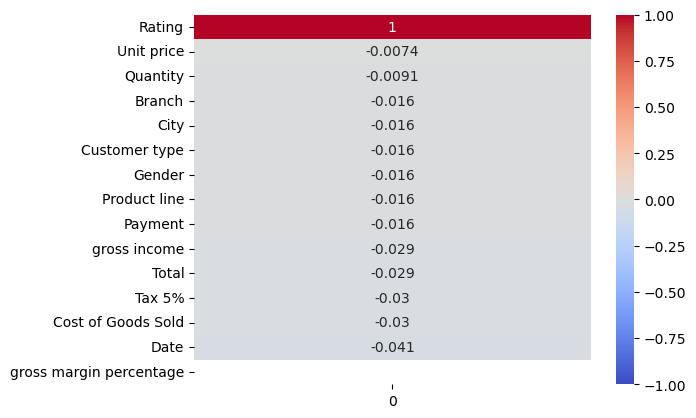

In [149]:
numeric_train = sales.select_dtypes(include=['number']) 
#putting correlatin data wtihin heatmap 
correlation_data = numeric_train.corrwith(sales["Rating"]).sort_values(ascending=False).to_frame()


sns.heatmap(correlation_data, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap='coolwarm' 
            )  

<Axes: >

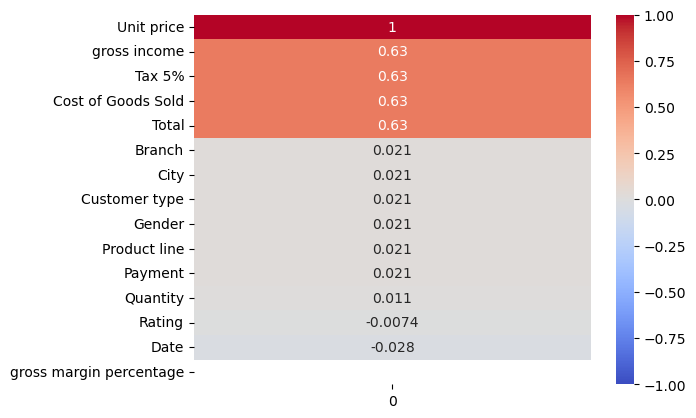

In [151]:
numeric_train = sales.select_dtypes(include=['number']) 
#putting correlatin data wtihin heatmap 
correlation_data = numeric_train.corrwith(sales["Unit price"]).sort_values(ascending=False).to_frame()


sns.heatmap(correlation_data, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap='coolwarm' 
            )  

Text(0.5, 1.0, 'Similar Ratings Across Branches')

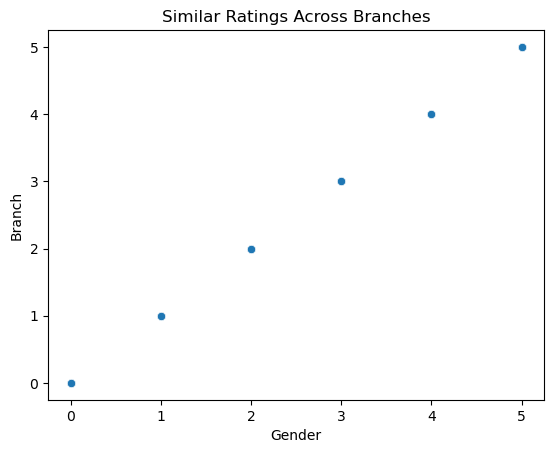

In [135]:
sns.scatterplot(data = sales, 
            x="Gender", 
            y="Branch") 
plt.title('Similar Ratings Across Branches')

Text(0.5, 1.0, 'Similar Ratings Across Branches')

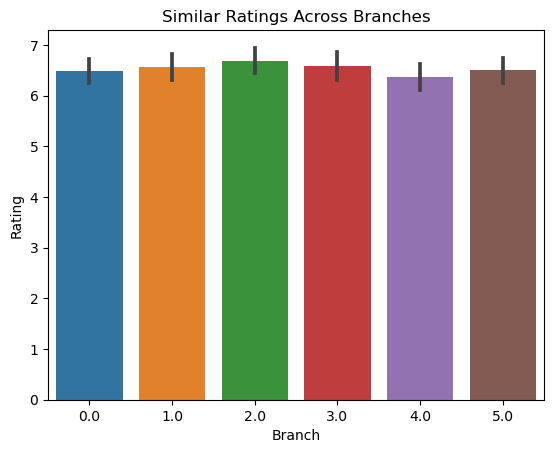

In [126]:
sns.barplot(data = sales, 
            x="Branch", 
            y="Rating") 
plt.title('Similar Ratings Across Branches')

Text(0.5, 1.0, 'Similar Ratings Across Payment Types')

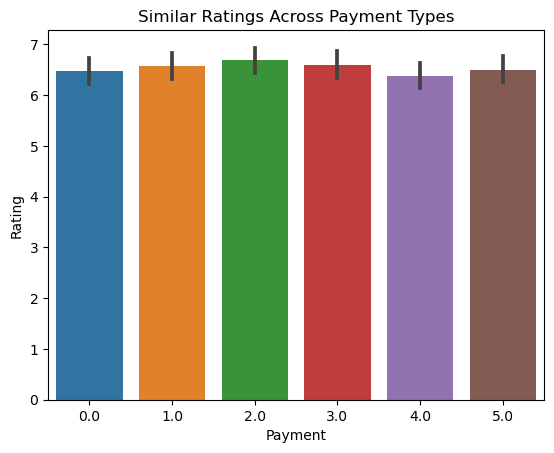

In [127]:
sns.barplot(data = sales, 
            x="Payment", 
            y="Rating") 
plt.title('Similar Ratings Across Payment Types')

Text(0.5, 1.0, 'Sales Analysis by Product Line and Branch')

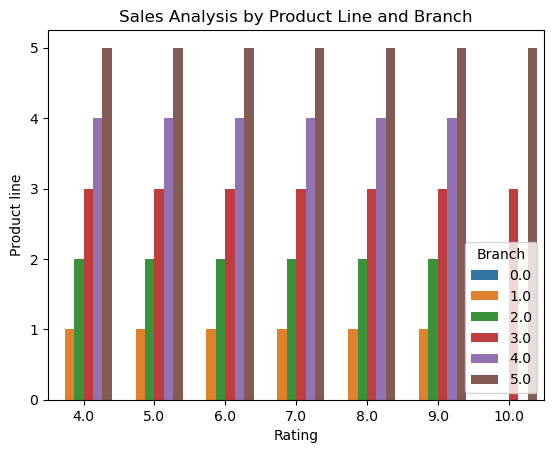

In [128]:
sns.barplot(data = sales, 
            x="Rating", 
            y="Product line", 
            hue="Branch") 
plt.title('Sales Analysis by Product Line and Branch')

In [182]:
#checking accuracy of random guessing 

sales["Rating"].value_counts(normalize = True) 

Rating
6.0     0.184
7.0     0.172
8.0     0.163
5.0     0.162
9.0     0.161
4.0     0.153
10.0    0.005
Name: proportion, dtype: float64

In [183]:
#dividing data into training and testing sets 
X = sales[["Customer type", "Product line", "Payment", "Gender", "Rating", "gross income"]]
y = sales[["Branch"]]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
y_train = y_train.iloc[:len(X_train)]
y_test = y_train.iloc[:len(X_test)]

In [185]:
#The Standard Scaler is a popular method in data preprocessing that standardizes the features by removing the mean and scaling to unit variance. It transforms the features in such a way that they follow a standard normal distribution, i.e., with a mean of 0 and a standard deviation of 1.
sc = StandardScaler() 


In [186]:
#fit the data to learn the current data and transform it to learn from new data 
X_train_sc = sc.fit_transform(X_train) 
X_test_sc = sc.fit_transform(X_test) 
y_train = y_train.iloc[:len(X_train_sc)]

In [187]:
#modeling via linear regression to see which points adapt to the link 
lr = LinearRegression()

In [188]:
#y_train = y_train.iloc[:len(X_train)] 
y_test = y_test.iloc[:len(X_test)] 

# Fit the model
lr.fit(X_train, y_train)





LinearRegression()

In [189]:
#calculate r2 score - how well the model predicts (0 being the worst, 1 being the best) 
lr.score(X_train, y_train)

1.0

In [190]:
lr.score(X_test,y_test) 

#the test model cannot explain differences within model 

-1.2012090719178752

In [191]:
#applying knn which baes prediction based of proximity of other data points 
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train_sc, y_train)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=32)

In [192]:
#prediction is higher than when initially rated 
knn.score(X_train_sc, y_train) 


0.9986666666666667

In [193]:
knn.score(X_test_sc, y_test)

#means testing the mean would give you a better idea than using a machine model

0.14

In [194]:
#setup variables to predict rmse of train adn test set
trainPreds = lr.predict(X_train)

In [195]:
testPreds = lr.predict(X_test)

In [196]:
#calculate RMSE (the average difference between a statistical model's predicted values and the actual values.)
mean_squared_error(y_train, trainPreds, squared = False)


2.1842332500975893e-12

In [197]:
#compare to our baseline model
y_test.mean()

Branch    2.636
dtype: float64

In [198]:
baselinePreds = np.full_like(y_test, y_test.mean(), dtype = float) 

In [200]:
#It measures the average squared difference between the predicted and the actual target values within a dataset.
mean_squared_error(y_test, baselinePreds, squared = False)

1.6992657237760078

In [206]:
dfexplain = pd.DataFrame({
    'Supermarket Features': X_train.columns, 
    'Coef': lr.coef_.flatten() if lr.coef_.ndim > 1 else lr.coef_
})



In [207]:
#there isn't a strong relationship in between the variables 
dfexplain

Supermarket Features          Coef
0        Customer type  2.500000e-01
1         Product line  2.500000e-01
2              Payment  2.500000e-01
3               Gender  2.500000e-01
4               Rating  1.996253e-14
5         gross income  1.909980e-17